In [1]:
using LinearAlgebra 
using Kronecker
using MKL
using Plots, PyPlot
using Random, Distributions
using RandomMatrices


(process:8024): GLib-GIO-WARNING **: 15:41:33.647: Unexpectedly, UWP app `KDEe.V.Okular_22.801.1132.0_x64__7vt06qxq7ptv8' (AUMId `KDEe.V.Okular_7vt06qxq7ptv8!KDEe.V.Okular') supports 5 extensions but has no verbs


In [2]:
#Defining the Basic Gates



#The X,Y,Z gates:

X = [0 1 ; 1 0 ];
Y = [0 -1im ; im 0 ];
Z = [1 0 ; 0 -1 ];

# The Hadamard and the Phase Gates:

H=1/sqrt(2)*[1 1 ; 1 -1];
S=[1 0; 0 im];
T=[1 0; 0 exp(im*pi/4)];


#The finite X,Y,Z Rotations:


function RX(r)
    exp(-im*r/2*X)
end


function RY(r)
    exp(-im*r/2*Y)
end


function RZ(r)
    exp(-im*r/2*Z)
end


#The two-body gates:

CNOT=[1 0 0 0; 0 1 0 0; 0 0 0 1; 0 0 1 0];
REVCNOT=kronecker(H, H)*CNOT*kronecker(H, H);

In [3]:
o=pi;
h=rand(12)*pi;
J=rand(12)*2*pi;
XRow=copy(kronecker(RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o)));
ZRow=copy(kronecker(RZ(h[1]),RZ(h[2]),RZ(h[3]),RZ(h[4]),RZ(h[5]),RZ(h[6]),RZ(h[7]),RZ(h[8]),RZ(h[9]),RZ(h[10]),RZ(h[11]),RZ(h[12])));


In [25]:
#Introducing the Imperfection in kicks

epsilon=0.39
o=pi-epsilon;
XRow=copy(kronecker(RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o)));
A=XRow*UEven*UOdd*ZRow;

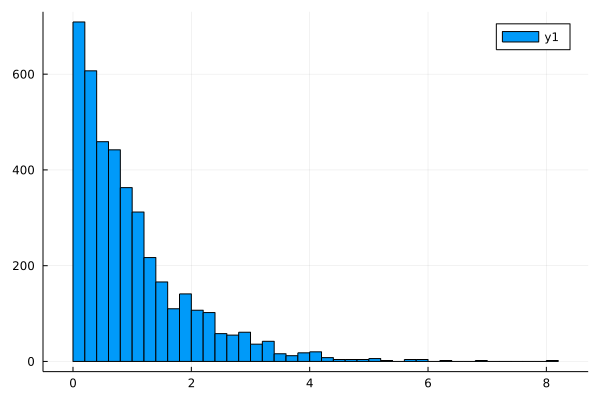

In [7]:
FU=fill(fill(0.1+im, 4,4), 11);
Theta=0.03;
        
    
   for j in 1:length(FU)
      
   Lone=copy(kronecker(exp(im*J[j]*Z),exp(im*J[j]*Z)))
   Ltwo=copy(kronecker(exp(im*Theta*X),exp(im*Theta*X)))
   Lthree=copy(kronecker(exp(im*Theta*Y),exp(im*Theta*Y)))
    
    
    FU[j]=CNOT*Lthree*Ltwo*Lone*CNOT;
    end
    
    
    
    UOdd=copy(kronecker(FU[1],FU[2],FU[3],FU[4],FU[5],FU[6]));
    UEven=copy(kronecker(I(2),FU[7],FU[8],FU[9],FU[10],FU[11],I(2)));


    A=XRow*UEven*UOdd*ZRow
    
   
 
    
    
EigA=eigvals(A);

N=fill(0.1,length(EigA))
N=angle.(EigA);

N= sort(N,rev=true);


EigA1=copy(N);
ls = deleteat!(EigA1,1);
la = deleteat!(N,length(N));
m=copy(la-ls)/mean(la-ls)

histogram(m)

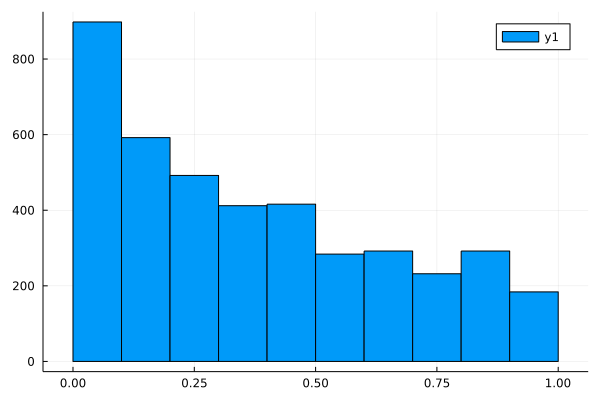

In [5]:

n=fill(0.1,length(EigA)-2);

for i in 1:length(n)
    #n[i]=m[i+1]/m[i];
    n[i]= minimum([m[i], m[i+1]])/maximum([m[i], m[i+1]]);
end

histogram(n)

In [6]:
mean(n)

0.37148402449811935

In [7]:
Zi=fill(fill(0.1+im, 4096,4096), 12);



Zi[1]=copy(kronecker(Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[2]=copy(kronecker(I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[3]=copy(kronecker(I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[4]=copy(kronecker(I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[5]=copy(kronecker(I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[6]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[7]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2)));
Zi[8]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2)));
Zi[9]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2)));
Zi[10]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2)));
Zi[11]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2)));
Zi[12]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z));

Cii=fill(0.1, 12,25);



In [26]:
At=I(4096)
Atdag=I(4096)
Adag=conj(transpose(A))

for t in 1:25
   # for l in 1:12
        LM=copy(Zi[5]*Atdag*Zi[5]*At);
        Cii[5,t]=real(LM[1365,1365]);
  #  end
    At=A*At;
    Atdag=Atdag*Adag;
end

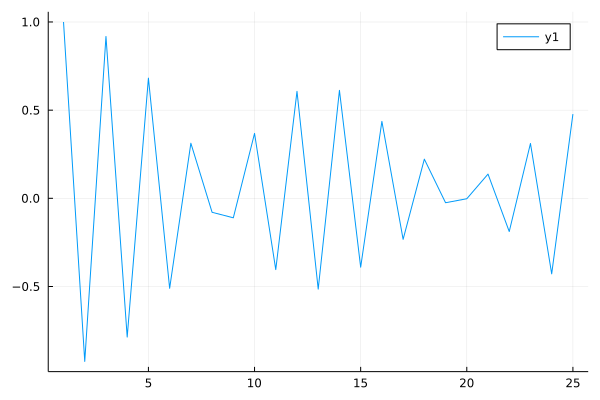

In [27]:
xax=1:25
Plots.plot(xax,Cii[5,:])

In [28]:

gr();
 
#plot
#histogram(m)
xax=1:25
Plots.plot(xax,Cii[5,:])
#save plot
Plots.savefig("fig/DTC-Minimal3-MBL-g0.39.png")

In [ ]:
$